In [3]:
import MEArec as mr
import matplotlib.pyplot as plt

In [4]:
cell_folder = "C:\\Users\\melin\\Anaconda3\\envs\\si_env\\Lib\\site-packages\\MEArec\\cell_models\\bbp"
working_folder = "C:\\Users\\melin\\Desktop\\COURS_M2_CNN\\Projet\\"
param_folder = working_folder + 'params\\'
files_folder = working_folder + 'temporary_files\\'
param_ext = '.yml'
files_ext = ".h5"
parallel_compute = 4

In [5]:
tempgen = mr.gen_templates(cell_models_folder=cell_folder, params=f"{param_folder}templates{param_ext}", n_jobs=parallel_compute)
mr.save_template_generator(tempgen, filename=f"{files_folder}template{files_ext}")

Running with 4 jobs
Aggregating templates



Simulation time: 1292.858281135559




Saved  templates in C:\Users\melin\Desktop\COURS_M2_CNN\Projet\temporary_files\template.h5 



In [6]:
spgen = mr.gen_spiketrains(params=f"{param_folder}spiketrains{param_ext}")
recgen = mr.gen_recordings(params=f"{param_folder}recordings{param_ext}", spgen = spgen, tempgen=tempgen, n_jobs=parallel_compute)
mr.save_recording_generator(recgen, filename=f"{files_folder}recordings{files_ext}")

c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\MEArec\generators\recordinggenerator.py:262: UserWarning: For n_jobs 4 you should set chunk_duration > 0. Setting chunk_duration to 5s
  warn(f'For n_jobs {self.n_jobs} you should set chunk_duration > 0. Setting chunk_duration to 5s')


dtype float32
Noise Level  10
Templates selection seed:  1
Selecting cells
Padding template edges
Elapsed pad time: 0.7448408603668213
Creating time jittering
Elapsed jitter time: 0.09175229072570801
Smoothing templates
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  1
Electrode modulaton
Adding noise
Noise seed:  1
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  32.181361899999956


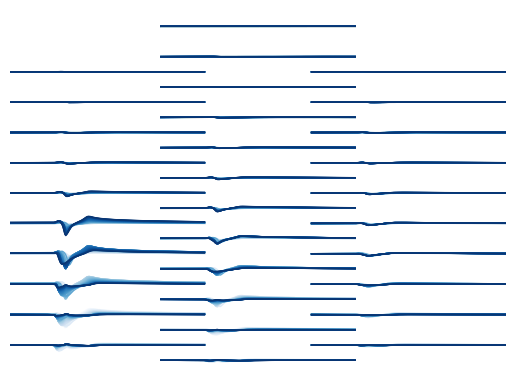

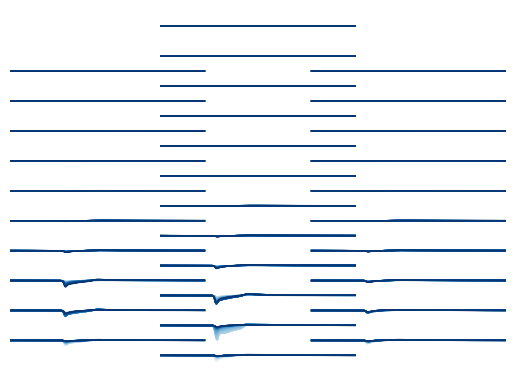

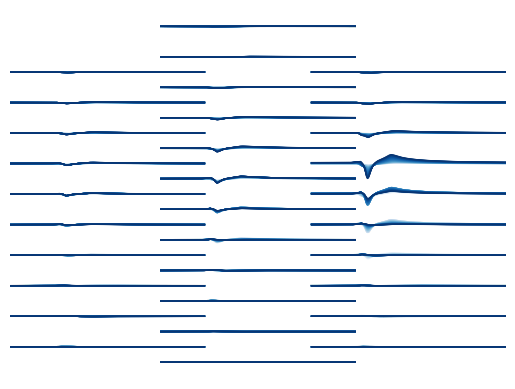

In [7]:
template_ids = recgen.template_ids

for template_id in template_ids :
    mr.plot_templates(tempgen, template_ids= template_id, drifting = True, cmap = 'Blues')
    plt.show()

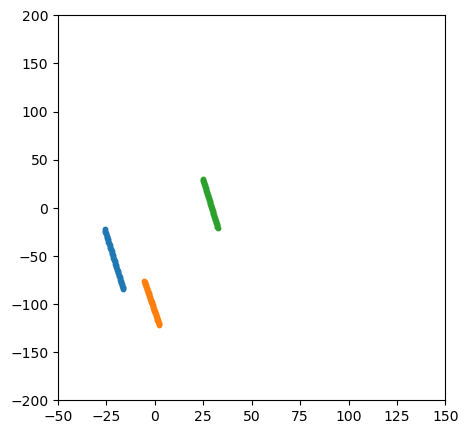

In [8]:
plt.figure(figsize=(5,5))
for template_id in template_ids :
    # Creating plot
    plt.scatter(tempgen.locations[template_id][:, 1], tempgen.locations[template_id][:, 2], s=10)
    plt.xlim(-50,150)
    plt.ylim(-200,200)
plt.show()

In [9]:
import spikeinterface.full as si 

In [10]:
recording_si, sorting_si = si.read_mearec(f"{files_folder}recordings{files_ext}")

In [11]:
recording_si_reduced = {} 
options = "no_drift", "drift"
frames = recording_si.get_num_frames()
times = {}
times['no_drift'] = 0, frames/2 - 1
times['drift'] = frames/2, frames 
for option in options :
    recording_si_reduced[option]= recording_si.frame_slice(times[option][0], times[option][1])

In [12]:
locations = {}
for option in options :
    for id in range (len(template_ids)) :
        sorting_id = sorting_si.select_units([f"#{id}"])
        wv_id = si.extract_waveforms(recording = recording_si_reduced[option], sorting= sorting_id, overwrite= False, folder=f"{files_folder}//wv_{option}_{id}", load_if_exists=True)
        locations[f"{option}#{id}"] = si.compute_spike_locations(wv_id, method = 'monopolar_triangulation')

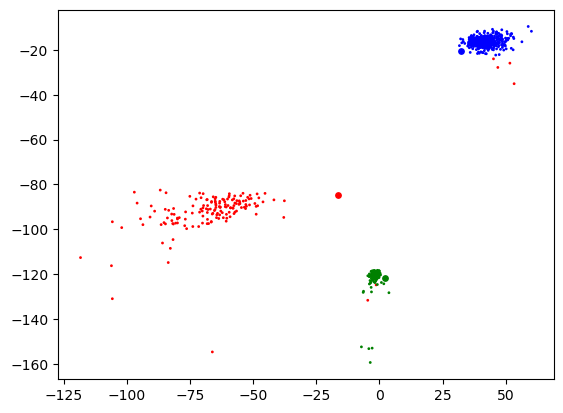

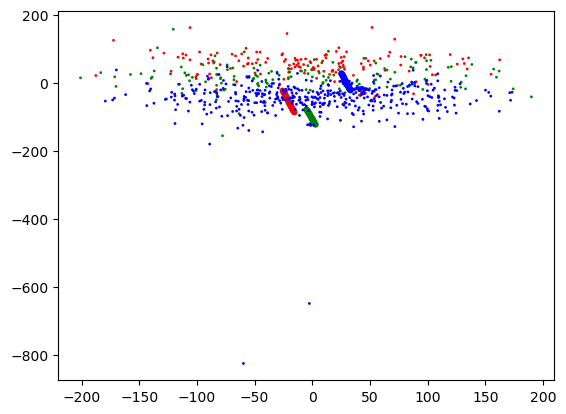

In [13]:
colors = ['red', 'green', 'blue']

for option in options :
    for id in range (len(template_ids)) :
        x = []
        y = []
        z = []
        for i in range (len(locations[f"{option}#{id}"])) :
            x.append(locations[f"{option}#{id}"][i][0])
            y.append(locations[f"{option}#{id}"][i][1])   
            z.append(locations[f"{option}#{id}"][i][2])
        plt.scatter(x, y, s = 4, edgecolors= 'none', color = colors[id])
        if option == 'no_drift':
            plt.scatter(tempgen.locations[template_ids[id]][0, 1], tempgen.locations[template_ids[id]][0, 2], s=15, color = colors[id])
        else :
            plt.scatter(tempgen.locations[template_ids[id]][:, 1], tempgen.locations[template_ids[id]][:, 2], s=10, color = colors[id])

    plt.show()